In [1]:
# Reference : https://github.com/golbin/TensorFlow-Tutorials
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 모델 구성

In [8]:
X = tf.placeholder(tf.float32, [None, 28*28]) # 손글씨 이미지는 28x28픽셀
Y = tf.placeholder(tf.float32, [None, 10]) # 결과는 0~9분류를 가짐
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([28*28, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))

model = tf.matmul(L2, W3)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

# 모델 학습

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        
        total_cost += cost_val
    
    print('Epoch :', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.format(total_cost/ total_batch))

Epoch : 0001 Avg. cost =  0.4261
Epoch : 0002 Avg. cost =  0.1622
Epoch : 0003 Avg. cost =  0.1100
Epoch : 0004 Avg. cost =  0.0880
Epoch : 0005 Avg. cost =  0.0708
Epoch : 0006 Avg. cost =  0.0590
Epoch : 0007 Avg. cost =  0.0521
Epoch : 0008 Avg. cost =  0.0438
Epoch : 0009 Avg. cost =  0.0422
Epoch : 0010 Avg. cost =  0.0352
Epoch : 0011 Avg. cost =  0.0342
Epoch : 0012 Avg. cost =  0.0319
Epoch : 0013 Avg. cost =  0.0293
Epoch : 0014 Avg. cost =  0.0256
Epoch : 0015 Avg. cost =  0.0262


# 결과확인

In [12]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 :', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0}))

정확도 : 0.9817


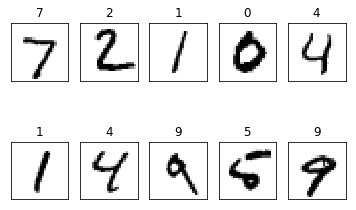

In [17]:
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})

import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()